In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tabulate import tabulate


In [2]:
df = pd.read_csv("model_runs.csv")
df.head()

,run_id,run_dir,timestamp,total_time_seconds,learning_rate,batch_size,epochs,hidden_sizes,dropout_rates,input_size,...,train_accuracy,train_f1_macro,train_precision_macro,train_recall_macro,test_loss,test_accuracy,test_f1_macro,test_precision_macro,test_recall_macro,notes
0,run_1_20251122_013835,runs\run_1_20251122_013835,2025-11-22T02:07:43.440864,1739.403414,0.0010,64,50,"[512, 256, 128]","[0.3, 0.3, 0.2]",150528,...,0.639610,0.638630,0.661215,0.639610,1.457492,0.59,0.591667,0.601181,0.59,NaN
1,run_2_20251122_020743,runs\run_2_20251122_020743,2025-11-22T03:09:54.427515,3724.741818,0.0001,32,100,"[512, 256, 128]","[0.2, 0.2, 0.2]",150528,...,0.944805,0.944710,0.944700,0.944805,3.177721,0.68,0.680545,0.682190,0.68,baseline. no dropout and regularization
2,run_3_20251122_030954,runs\run_3_20251122_030954,2025-11-22T05:38:49.635664,8924.781317,0.0005,64,75,"[1024, 512, 256]","[0.5, 0.4, 0.3]",150528,...,0.639610,0.640565,0.658346,0.639610,1.700395,0.55,0.544744,0.563939,0.55,NaN
3,run_1_20251127_161138,runs/run_1_20251127_161138,2025-11-27T16:27:44.546008,963.361182,0.0001,32,100,"[512, 256, 128]","[0.3, 0.3, 0.3]",150528,...,0.876623,0.876369,0.876404,0.876623,2.656536,0.65,0.648835,0.650962,0.65,NaN
4,run_2_20251127_162744,runs/run_2_20251127_162744,2025-11-27T16:46:45.705083,1138.556658,0.0001,32,100,"[512, 256, 128]","[0.5, 0.5, 0.4]",150528,...,0.711039,0.717707,0.738577,0.711039,1.674422,0.56,0.557614,0.583929,0.56,NaN


In [17]:
df.columns

Index(['run_id', 'run_dir', 'timestamp', 'total_time_seconds', 'learning_rate',
       'batch_size', 'epochs', 'hidden_sizes', 'dropout_rates', 'input_size',
       'num_classes', 'train_loss', 'train_accuracy', 'train_f1_macro',
       'train_precision_macro', 'train_recall_macro', 'test_loss',
       'test_accuracy', 'test_f1_macro', 'test_precision_macro',
       'test_recall_macro', ' notes', 'overfit_gap', 'total_hidden_units',
       'num_layers', 'avg_dropout'],
      dtype='object')

In [50]:
top_runs = df.sort_values('test_f1_macro', ascending=False).head(5)
top_runs[['learning_rate', 'batch_size', 'epochs', "dropout_rates",'hidden_sizes', 'test_f1_macro']]

,learning_rate,batch_size,epochs,dropout_rates,hidden_sizes,test_f1_macro
11,0.0005,32,60,"[0.4, 0.4, 0.3]","[512, 256, 128]",0.691185
12,0.0005,32,60,"[0.4, 0.4, 0.3]","[512, 256, 128]",0.690128
9,0.0010,32,60,"[0.5, 0.5, 0.4]","[1024, 512, 256]",0.689519
14,0.0005,32,60,"[0.4, 0.4, 0.3]","[512, 256, 128]",0.689190
1,0.0001,32,100,"[0.2, 0.2, 0.2]","[512, 256, 128]",0.680545


In [4]:
df['overfit_gap'] = df['train_accuracy'] - df['test_accuracy']
print(df[['hidden_sizes', 'dropout_rates', 'overfit_gap']].sort_values('overfit_gap', ascending=False).head())

       hidden_sizes    dropout_rates  overfit_gap
1   [512, 256, 128]  [0.2, 0.2, 0.2]     0.264805
3   [512, 256, 128]  [0.3, 0.3, 0.3]     0.226623
23    [128, 64, 32]  [0.4, 0.4, 0.3]     0.170130
11  [512, 256, 128]  [0.4, 0.4, 0.3]     0.161948
4   [512, 256, 128]  [0.5, 0.5, 0.4]     0.151039


In [5]:
df.groupby("batch_size").apply(lambda x: x.nlargest(3, 'test_f1_macro'))[['learning_rate', 'batch_size', 'epochs', "dropout_rates",'hidden_sizes', 'test_f1_macro']]

/var/folders/ml/_n5d8jr13tj9xwkyslsb8ty80000gn/T/ipykernel_12878/642865571.py:1: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df.groupby("batch_size").apply(lambda x: x.nlargest(3, 'test_f1_macro'))[['learning_rate', 'batch_size', 'epochs', "dropout_rates",'hidden_sizes', 'test_f1_macro']]


learning_rate  batch_size  epochs    dropout_rates  \
batch_size                                                          
4          19         0.0005           4      60  [0.5, 0.5, 0.5]   
           20         0.0090           4      60  [0.3, 0.4, 0.5]   
16         21         0.0010          16      60  [0.3, 0.4, 0.5]   
32         11         0.0005          32      60  [0.4, 0.4, 0.3]   
           12         0.0005          32      60  [0.4, 0.4, 0.3]   
           9          0.0010          32      60  [0.5, 0.5, 0.4]   
64         0          0.0010          64      50  [0.3, 0.3, 0.2]   
           2          0.0005          64      75  [0.5, 0.4, 0.3]   
           18         0.0005          64      60  [0.5, 0.5, 0.5]   

                   hidden_sizes  test_f1_macro  
batch_size                                      
4          19    [256, 128, 64]       0.518162  
           20     [128, 64, 32]       0.100000  
16         21     [128, 64, 32]       0.529673  
32         11   [512, 256, 128]       0.691185  
           12   [512, 256, 128]       0.690128  
           9   [1024, 512, 256]       0.689519  
64         0    [512, 256, 128]       0.591667  
           2   [1024, 512, 256]       0.544744  
           18    [256, 128, 64]       0.490807

In [6]:
# Group by learning rate and see average performance
df.groupby('learning_rate')['test_accuracy'].agg(['mean', 'std', 'count'])


,mean,std,count
learning_rate,,,
0.0001,0.630000,0.062450,3
0.0005,0.606000,0.088139,15
0.0010,0.614286,0.058554,7
0.0030,0.450000,NaN,1
0.0090,0.250000,NaN,1
0.0100,0.250000,NaN,1


In [7]:
df.groupby('batch_size')['test_accuracy'].agg(['mean', 'std', 'count'])


,mean,std,count
batch_size,,,
4,0.385000,0.190919,2
16,0.530000,NaN,1
32,0.603636,0.112230,22
64,0.550000,0.040000,3


In [8]:
df.groupby('dropout_rates')['test_accuracy'].agg(['mean', 'std', 'count'])


,mean,std,count
dropout_rates,,,
"[0.2, 0.2, 0.1]",0.640,NaN,1
"[0.2, 0.2, 0.2]",0.680,NaN,1
"[0.3, 0.3, 0.2]",0.595,0.007071,2
"[0.3, 0.3, 0.3]",0.450,0.282843,2
"[0.3, 0.4, 0.5]",0.390,0.197990,2
"[0.4, 0.4, 0.3]",0.642,0.087025,10
"[0.5, 0.4, 0.3]",0.550,NaN,1
"[0.5, 0.5, 0.4]",0.590,0.098742,5
"[0.5, 0.5, 0.5]",0.530,0.026458,3


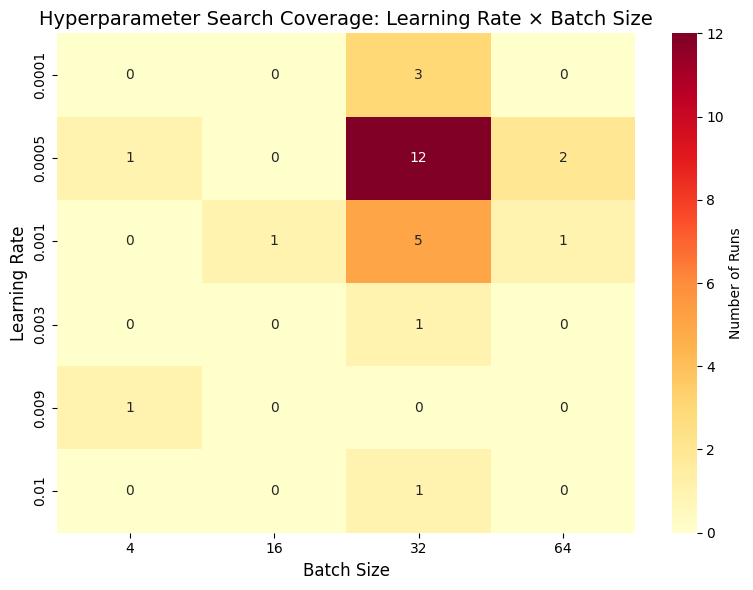

In [ ]:

pivot_data = df.groupby(['learning_rate', 'batch_size']).size().reset_index(name='runs_tested')
pivot_table = pivot_data.pivot(index='learning_rate', columns='batch_size', values='runs_tested').fillna(0)

plt.figure(figsize=(8, 6))
sns.heatmap(pivot_table, annot=True, fmt='g', cmap='YlOrRd', cbar_kws={'label': 'Number of Runs'})
plt.title('Hyperparameter Search Coverage: Learning Rate × Batch Size', fontsize=14)
plt.xlabel('Batch Size', fontsize=12)
plt.ylabel('Learning Rate', fontsize=12)
plt.tight_layout()
plt.show()

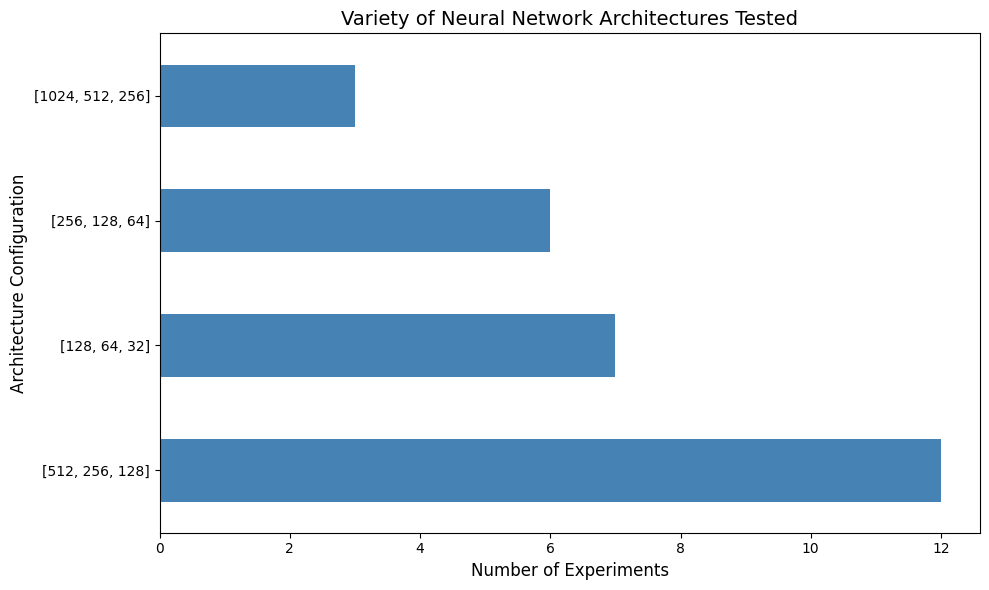

In [13]:
architecture_counts = df['hidden_sizes'].value_counts().head(10)

plt.figure(figsize=(10, 6))
architecture_counts.plot(kind='barh', color='steelblue')
plt.xlabel('Number of Experiments', fontsize=12)
plt.ylabel('Architecture Configuration', fontsize=12)
plt.title('Variety of Neural Network Architectures Tested', fontsize=14)
plt.tight_layout()
plt.show()

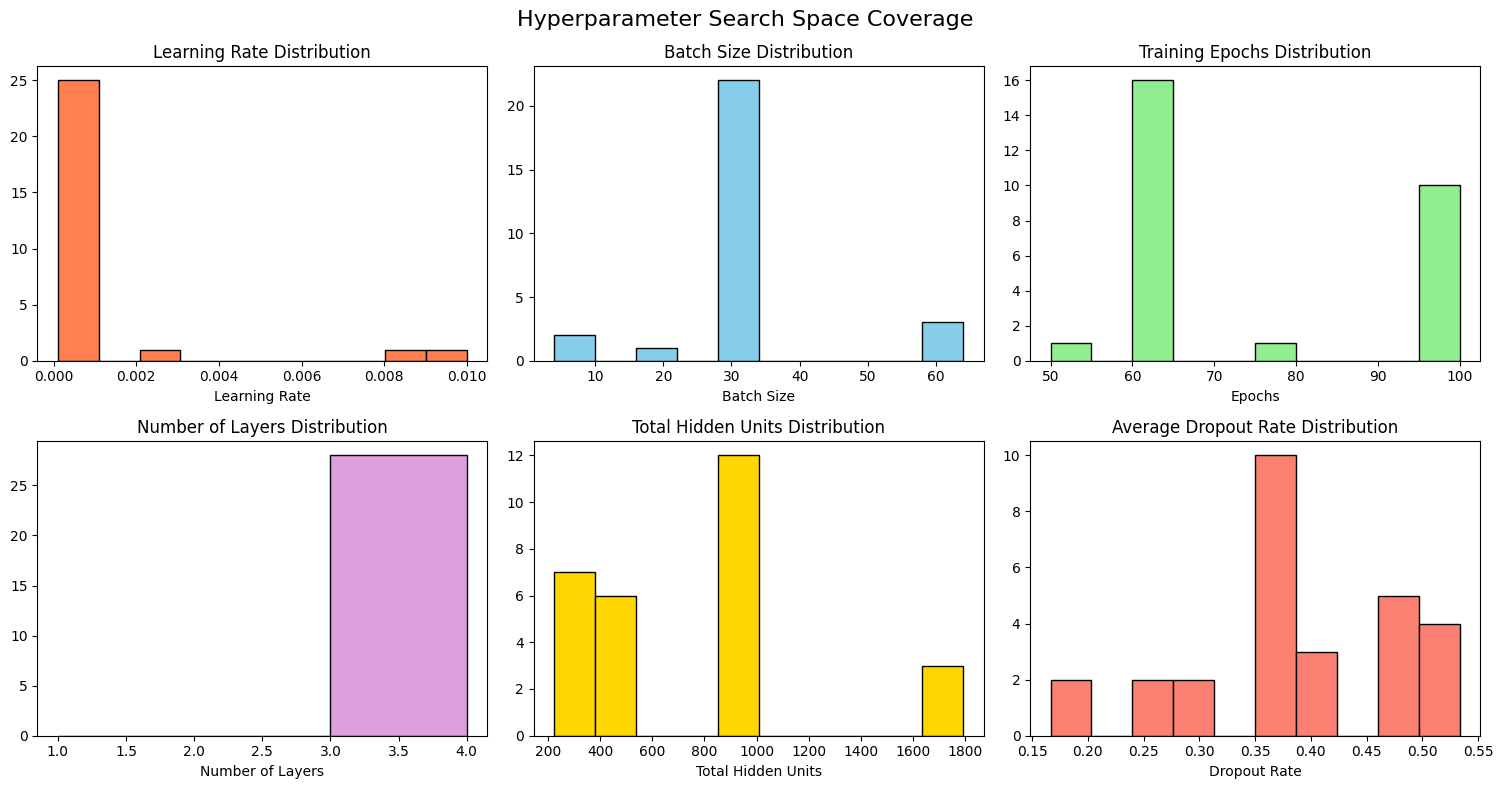

In [16]:
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
fig.suptitle('Hyperparameter Search Space Coverage', fontsize=16)

axes[0, 0].hist(df['learning_rate'], bins=10, color='coral', edgecolor='black')
axes[0, 0].set_title('Learning Rate Distribution')
axes[0, 0].set_xlabel('Learning Rate')

axes[0, 1].hist(df['batch_size'], bins=10, color='skyblue', edgecolor='black')
axes[0, 1].set_title('Batch Size Distribution')
axes[0, 1].set_xlabel('Batch Size')

axes[0, 2].hist(df['epochs'], bins=10, color='lightgreen', edgecolor='black')
axes[0, 2].set_title('Training Epochs Distribution')
axes[0, 2].set_xlabel('Epochs')

axes[1, 0].hist(df['num_layers'], bins=range(1, df['num_layers'].max()+2), color='plum', edgecolor='black')
axes[1, 0].set_title('Number of Layers Distribution')
axes[1, 0].set_xlabel('Number of Layers')

axes[1, 1].hist(df['total_hidden_units'], bins=10, color='gold', edgecolor='black')
axes[1, 1].set_title('Total Hidden Units Distribution')
axes[1, 1].set_xlabel('Total Hidden Units')

# Average dropout rate
df['avg_dropout'] = df['dropout_rates'].apply(lambda x: np.mean(eval(x)) if isinstance(x, str) else np.mean(x))
axes[1, 2].hist(df['avg_dropout'], bins=10, color='salmon', edgecolor='black')
axes[1, 2].set_title('Average Dropout Rate Distribution')
axes[1, 2].set_xlabel('Dropout Rate')


plt.tight_layout()
plt.savefig('./images/hyperparameter_search_space_coverage.png', dpi=300, bbox_inches='tight')
plt.show()

In [18]:
configs = pd.read_csv("./runs/runs_config.csv")

In [19]:
configs.head()

,run_id,architecture_config_dropout_rates,architecture_config_hidden_sizes,architecture_config_input_size,architecture_config_num_classes,hyperparameters_batch_size,hyperparameters_dropout_rates,hyperparameters_early_stopping_min_delta,hyperparameters_early_stopping_mode,hyperparameters_early_stopping_patience,...,transform_config_color_jitter_contrast,transform_config_color_jitter_saturation,transform_config_image_size,transform_config_normalize_mean,transform_config_normalize_std,transform_config_random_horizontal_flip_prob,transform_config_random_resized_crop_ratio,transform_config_random_resized_crop_scale,transform_config_random_resized_crop_size,transform_config_random_rotation_degrees
0,run_1_20251122_013835,"0.3,0.3,0.2","512,256,128",150528,4,64,"0.3,0.3,0.2",NaN,NaN,NaN,...,NaN,NaN,"224,224","0.485,0.456,0.406","0.229,0.224,0.225",0.5,NaN,NaN,NaN,15
1,run_1_20251127_161138,"0.3,0.3,0.3","512,256,128",150528,4,32,"0.3,0.3,0.3",NaN,NaN,NaN,...,NaN,NaN,"224,224","0.485,0.456,0.406","0.229,0.224,0.225",0.5,NaN,NaN,NaN,15
2,run_1_20251127_172942,"0.3,0.3,0.3","512,256,128",150528,4,32,"0.3,0.3,0.3",NaN,NaN,NaN,...,NaN,NaN,"224,224","0.485,0.456,0.406","0.229,0.224,0.225",0.5,NaN,NaN,NaN,15
3,run_1_20251127_174614,"0.5,0.5,0.4","512,256,128",150528,4,32,"0.5,0.5,0.4",NaN,NaN,NaN,...,NaN,NaN,"224,224","0.485,0.456,0.406","0.229,0.224,0.225",0.5,NaN,NaN,NaN,15
4,run_1_20251127_222008,"0.5,0.5,0.4","1024,512,256",12288,4,32,"0.5,0.5,0.4",NaN,NaN,NaN,...,NaN,NaN,"64,64","0.485,0.456,0.406","0.229,0.224,0.225",0.5,NaN,NaN,NaN,15


In [20]:
configs.columns

Index(['run_id', 'architecture_config_dropout_rates',
       'architecture_config_hidden_sizes', 'architecture_config_input_size',
       'architecture_config_num_classes', 'hyperparameters_batch_size',
       'hyperparameters_dropout_rates',
       'hyperparameters_early_stopping_min_delta',
       'hyperparameters_early_stopping_mode',
       'hyperparameters_early_stopping_patience',
       'hyperparameters_early_stopping_restore_best_weights',
       'hyperparameters_epochs', 'hyperparameters_hidden_sizes',
       'hyperparameters_image_size', 'hyperparameters_input_size',
       'hyperparameters_learning_rate', 'hyperparameters_name',
       'hyperparameters_notes', 'hyperparameters_weight_decay',
       'model_config_batch_size', 'model_config_best_val_loss',
       'model_config_delta', 'model_config_device', 'model_config_epochs',
       'model_config_learning_rate', 'model_config_no_improvement_count',
       'model_config_patience', 'model_config_weight_decay',
       'transf

In [23]:
df_joined = df.merge(configs, on='run_id', how='inner')
df_joined.head()

,run_id,run_dir,timestamp,total_time_seconds,learning_rate,batch_size,epochs,hidden_sizes,dropout_rates,input_size,...,transform_config_color_jitter_contrast,transform_config_color_jitter_saturation,transform_config_image_size,transform_config_normalize_mean,transform_config_normalize_std,transform_config_random_horizontal_flip_prob,transform_config_random_resized_crop_ratio,transform_config_random_resized_crop_scale,transform_config_random_resized_crop_size,transform_config_random_rotation_degrees
0,run_1_20251122_013835,runs\run_1_20251122_013835,2025-11-22 02:07:43.440864,1739.403414,0.0010,64,50,"[512, 256, 128]","[0.3, 0.3, 0.2]",150528,...,NaN,NaN,"224,224","0.485,0.456,0.406","0.229,0.224,0.225",0.5,NaN,NaN,NaN,15
1,run_2_20251122_020743,runs\run_2_20251122_020743,2025-11-22 03:09:54.427515,3724.741818,0.0001,32,100,"[512, 256, 128]","[0.2, 0.2, 0.2]",150528,...,NaN,NaN,"64,64","0.485,0.456,0.406","0.229,0.224,0.225",0.5,NaN,NaN,NaN,15
2,run_3_20251122_030954,runs\run_3_20251122_030954,2025-11-22 05:38:49.635664,8924.781317,0.0005,64,75,"[1024, 512, 256]","[0.5, 0.4, 0.3]",150528,...,NaN,NaN,"224,224","0.485,0.456,0.406","0.229,0.224,0.225",0.5,NaN,NaN,NaN,15
3,run_1_20251127_161138,runs/run_1_20251127_161138,2025-11-27 16:27:44.546008,963.361182,0.0001,32,100,"[512, 256, 128]","[0.3, 0.3, 0.3]",150528,...,NaN,NaN,"224,224","0.485,0.456,0.406","0.229,0.224,0.225",0.5,NaN,NaN,NaN,15
4,run_2_20251127_162744,runs/run_2_20251127_162744,2025-11-27 16:46:45.705083,1138.556658,0.0001,32,100,"[512, 256, 128]","[0.5, 0.5, 0.4]",150528,...,NaN,NaN,"224,224","0.485,0.456,0.406","0.229,0.224,0.225",0.5,NaN,NaN,NaN,15


In [24]:
df_joined.columns

Index(['run_id', 'run_dir', 'timestamp', 'total_time_seconds', 'learning_rate',
       'batch_size', 'epochs', 'hidden_sizes', 'dropout_rates', 'input_size',
       'num_classes', 'train_loss', 'train_accuracy', 'train_f1_macro',
       'train_precision_macro', 'train_recall_macro', 'test_loss',
       'test_accuracy', 'test_f1_macro', 'test_precision_macro',
       'test_recall_macro', ' notes', 'overfit_gap', 'total_hidden_units',
       'num_layers', 'avg_dropout', 'architecture_config_dropout_rates',
       'architecture_config_hidden_sizes', 'architecture_config_input_size',
       'architecture_config_num_classes', 'hyperparameters_batch_size',
       'hyperparameters_dropout_rates',
       'hyperparameters_early_stopping_min_delta',
       'hyperparameters_early_stopping_mode',
       'hyperparameters_early_stopping_patience',
       'hyperparameters_early_stopping_restore_best_weights',
       'hyperparameters_epochs', 'hyperparameters_hidden_sizes',
       'hyperparameters_ima

In [26]:
optimization_params = df_joined[[
    'learning_rate', 
    'hyperparameters_weight_decay',
    'batch_size',  
    'epochs', 
]].copy()


In [38]:
# Create a nice summary table
summary = {
    'Parameter': ['Learning Rate', 'Weight Decay', 'Batch Size', 'Epochs', 'Early Stopping Patience'],
    'Min': [
        df_joined['learning_rate'].min(),
        df_joined['hyperparameters_weight_decay'].min(),
        df_joined['batch_size'].min(),
        df_joined['epochs'].min(),
        df_joined['hyperparameters_early_stopping_patience'].min()
    ],
    'Max': [
        df_joined['learning_rate'].max(),
        df_joined['hyperparameters_weight_decay'].max(),
        df_joined['batch_size'].max(),
        df_joined['epochs'].max(),
        df_joined['hyperparameters_early_stopping_patience'].max()
    ],
    'Values Tested': [
        df_joined['learning_rate'].nunique(),
        df_joined['hyperparameters_weight_decay'].nunique(),
        df_joined['batch_size'].nunique(),
        df_joined['epochs'].nunique(),
        df_joined['hyperparameters_early_stopping_patience'].nunique()
    ]
}

import pandas as pd
summary_df = pd.DataFrame(summary)
print(tabulate(summary_df, headers='keys', tablefmt='grid', showindex=False))


+-------------------------+---------+--------+-----------------+
| Parameter               |     Min |    Max |   Values Tested |
+=========================+=========+========+=================+
| Learning Rate           |  0.0001 |   0.01 |               6 |
+-------------------------+---------+--------+-----------------+
| Weight Decay            |  0.0001 |   0.1  |               6 |
+-------------------------+---------+--------+-----------------+
| Batch Size              |  4      |  64    |               4 |
+-------------------------+---------+--------+-----------------+
| Epochs                  | 50      | 100    |               4 |
+-------------------------+---------+--------+-----------------+
| Early Stopping Patience |  7      |  20    |               3 |
+-------------------------+---------+--------+-----------------+


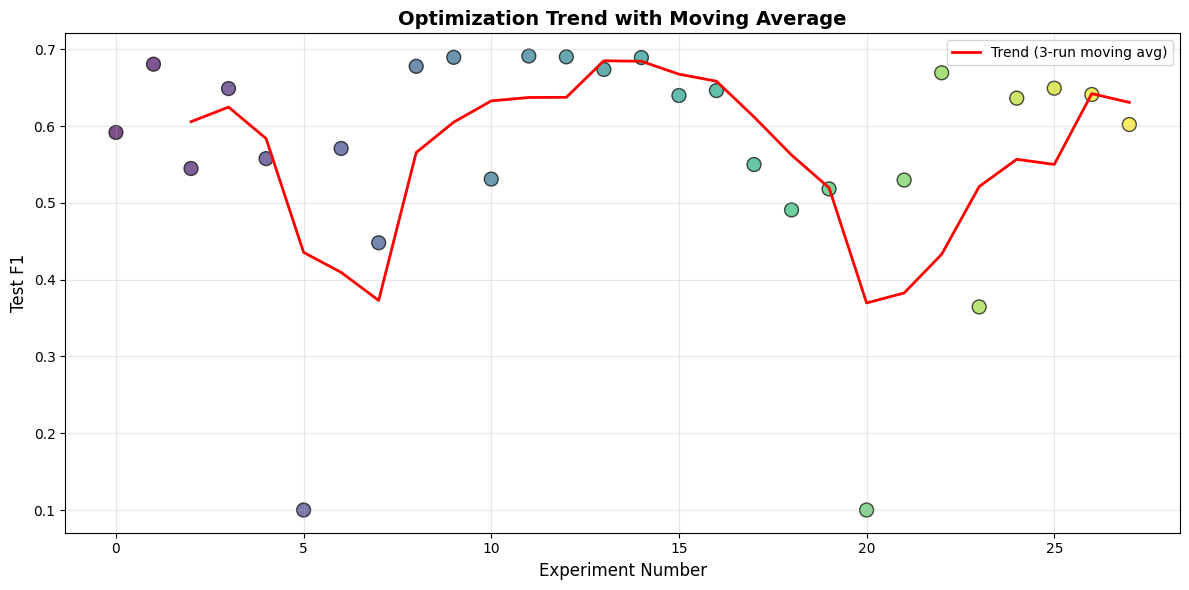

In [49]:
import matplotlib.pyplot as plt

df_sorted = df.sort_values('timestamp').reset_index(drop=True)

plt.figure(figsize=(12, 6))
plt.scatter(df_sorted.index, df_sorted['test_f1_macro'], 
           c=df_sorted.index, cmap='viridis', s=100, edgecolor='black', alpha=0.7)
plt.plot(df_sorted.index, df_sorted['test_f1_macro'].rolling(window=3).mean(), 
        color='red', linewidth=2, label='Trend (3-run moving avg)')
plt.xlabel('Experiment Number', fontsize=12)
plt.ylabel('Test F1', fontsize=12)
plt.title('Optimization Trend with Moving Average', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.savefig('optimization_trend.png', dpi=300, bbox_inches='tight')
plt.show()

Performance by Input Size:
  image_size  test_acc_mean  count
0    224,224         0.5375      8
1      64,64         0.5965     20


ValueError: invalid literal for int() with base 10: '224,224'

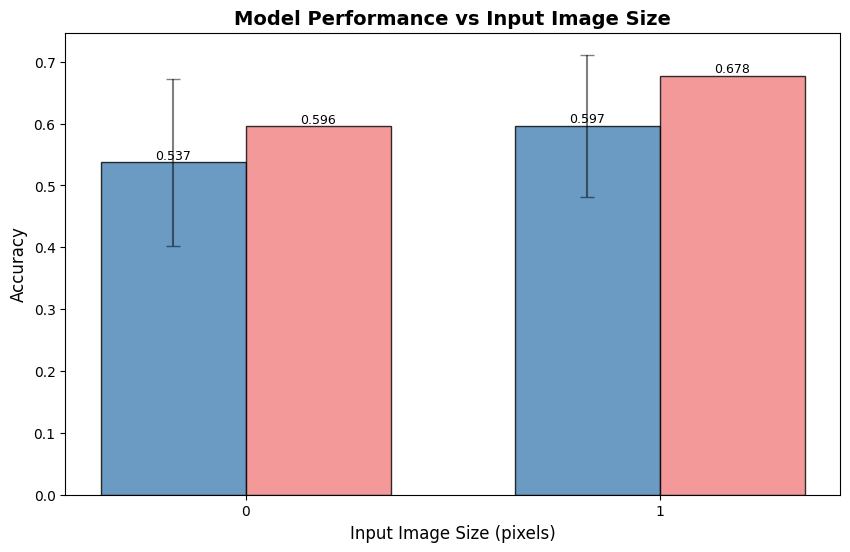

In [54]:
import matplotlib.pyplot as plt
import numpy as np

# Group by image/input size and calculate mean performance
size_performance = df_joined.groupby('transform_config_image_size').agg({
    'test_accuracy': ['mean', 'std', 'count'],
    'test_f1_macro': 'mean',
    'train_accuracy': 'mean',
    'overfit_gap': 'mean'
}).reset_index()

# Flatten column names
size_performance.columns = ['image_size', 'test_acc_mean', 'test_acc_std', 'count', 
                            'test_f1_mean', 'train_acc_mean', 'overfit_gap_mean']

# Sort by image size
size_performance = size_performance.sort_values('image_size')

print("Performance by Input Size:")
print(size_performance[['image_size', 'test_acc_mean', 'count']])

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

x = range(len(size_performance))
width = 0.35

# Plot test and train accuracy
bars1 = ax.bar([i - width/2 for i in x], size_performance['test_acc_mean'], 
               width, label='Test Accuracy', color='steelblue', edgecolor='black', alpha=0.8)
bars2 = ax.bar([i + width/2 for i in x], size_performance['train_acc_mean'], 
               width, label='Train Accuracy', color='lightcoral', edgecolor='black', alpha=0.8)

# Add error bars for test accuracy
ax.errorbar(x=[i - width/2 for i in x], y=size_performance['test_acc_mean'], 
            yerr=size_performance['test_acc_std'], fmt='none', color='black', 
            capsize=5, alpha=0.5)

# Add value labels on bars
for i, (bar1, bar2) in enumerate(zip(bars1, bars2)):
    height1 = bar1.get_height()
    height2 = bar2.get_height()
    ax.text(bar1.get_x() + bar1.get_width()/2., height1,
            f'{height1:.3f}', ha='center', va='bottom', fontsize=9)
    ax.text(bar2.get_x() + bar2.get_width()/2., height2,
            f'{height2:.3f}', ha='center', va='bottom', fontsize=9)

ax.set_xlabel('Input Image Size (pixels)', fontsize=12)
ax.set_ylabel('Accuracy', fontsize=12)
ax.set_title('Model Performance vs Input Image Size', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels([f'{int(s)}×{int(s)}' for s in size_performance['image_size']])
ax.legend()
ax.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig('performance_vs_input_size.png', dpi=300, bbox_inches='tight')
plt.show()

# Print summary
print("\n" + "="*50)
print("SUMMARY: Impact of Input Size")
print("="*50)
for _, row in size_performance.iterrows():
    print(f"\nImage Size: {int(row['image_size'])}×{int(row['image_size'])}")
    print(f"  Test Accuracy:  {row['test_acc_mean']:.3f} (±{row['test_acc_std']:.3f})")
    print(f"  Test F1:        {row['test_f1_mean']:.3f}")
    print(f"  Overfit Gap:    {row['overfit_gap_mean']:.3f}")
    print(f"  # Experiments:  {int(row['count'])}")